In [22]:
# Librerias necesarias para todo el proceso de modelado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Lectura del csv
df = pd.read_csv("../data/hospital_readmissions.csv")

# Conteo de filas y columnas
print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")

# Estadistica descriptiva de las variables númericas del df
display(df.describe())

# Tipos de datos y nulos
display(df.info())

# Contar nulos
display(df.isna().sum().sort_values(ascending=False))

Filas: 25000 | Columnas: 17


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

None

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

readmitted
no     13246
yes    11754
Name: count, dtype: int64
readmitted
no     52.984
yes    47.016
Name: proportion, dtype: float64


Text(0, 0.5, 'Número de pacientes')

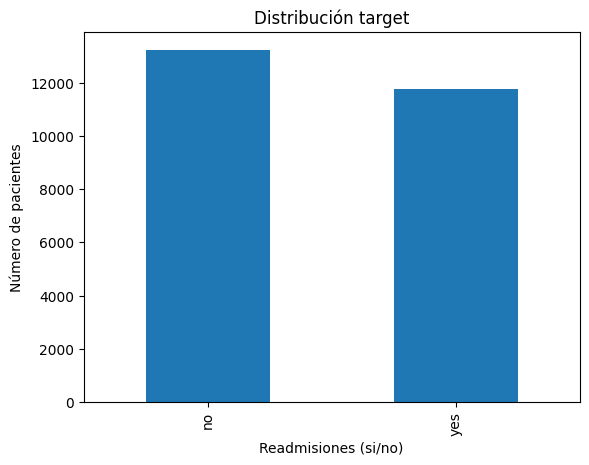

In [24]:
# Conteo de la variable objeto
target_count = df["readmitted"].value_counts()
print(target_count)

# Porcentaje de la variable objeto
target_percent = df["readmitted"].value_counts(normalize=True) * 100
print(target_percent)

target_count.plot(kind="bar")
plt.title("Distribución target")
plt.xlabel("Readmisiones (si/no)")
plt.ylabel("Número de pacientes")

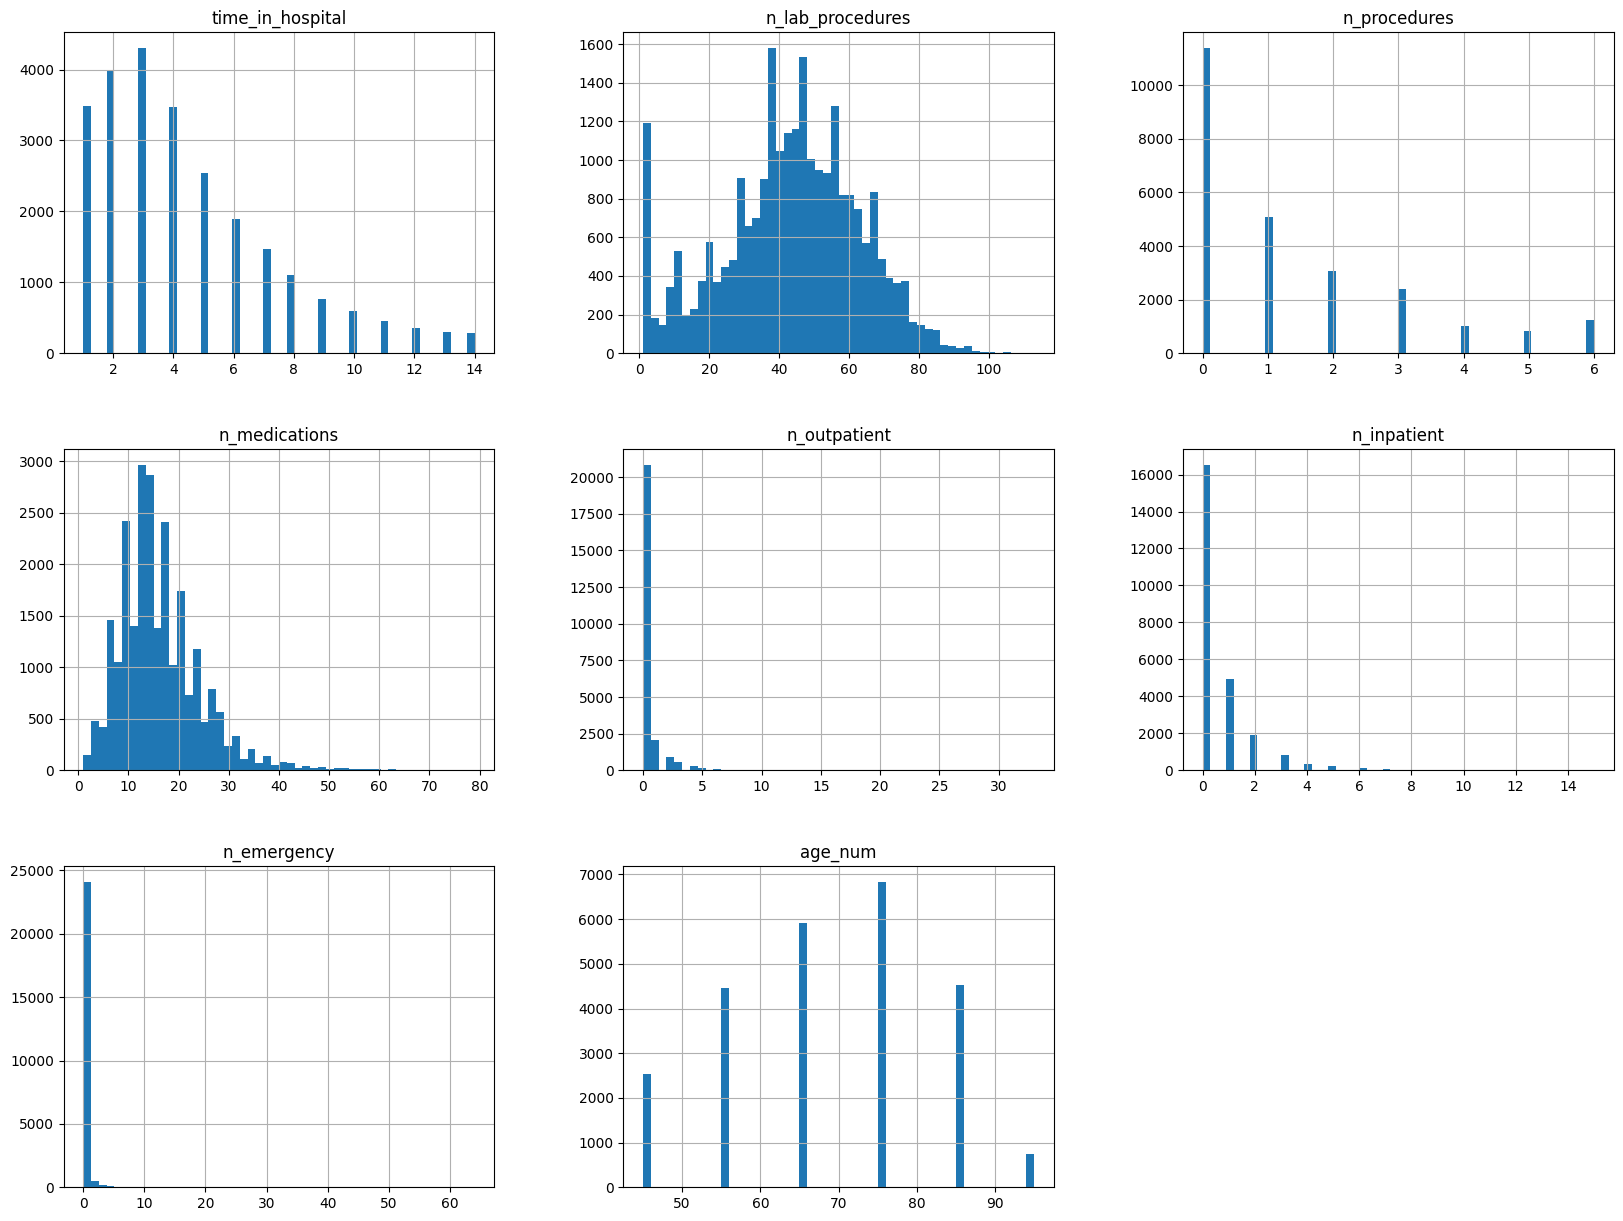

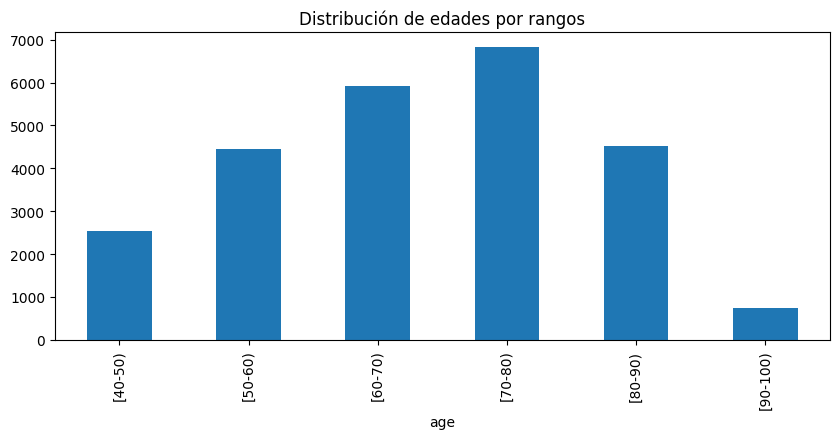

C:\Users\Jesus\AppData\Local\Temp\ipykernel_17100\32971195.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["age_num"] = df["age"].str.replace(r"[\[\)]", "", regex=True).replace(age_map)


,age,age_num
0,[70-80),75
1,[70-80),75
2,[50-60),55
3,[70-80),75
4,[60-70),65
5,[40-50),45
6,[50-60),55
7,[60-70),65
8,[80-90),85
9,[70-80),75


In [29]:
# Histogramas de variables númericas
df.hist(bins=50, figsize=(20, 15))
plt.show()

df["age"].value_counts().sort_index().plot(kind='bar', figsize=(10, 4))
plt.title("Distribución de edades por rangos")
plt.show()

df["age"].value_counts(ascending=False)

age_map = {
    "40-50" : 45,
    "50-60" : 55,
    "60-70" : 65,
    "70-80" : 75,
    "80-90" : 85,
    "90-100" : 95
}

df["age_num"] = df["age"].str.replace(r"[\[\)]", "", regex=True).replace(age_map)
df["age_num"].value_counts(ascending=False)

df[["age", "age_num"]].head(10)


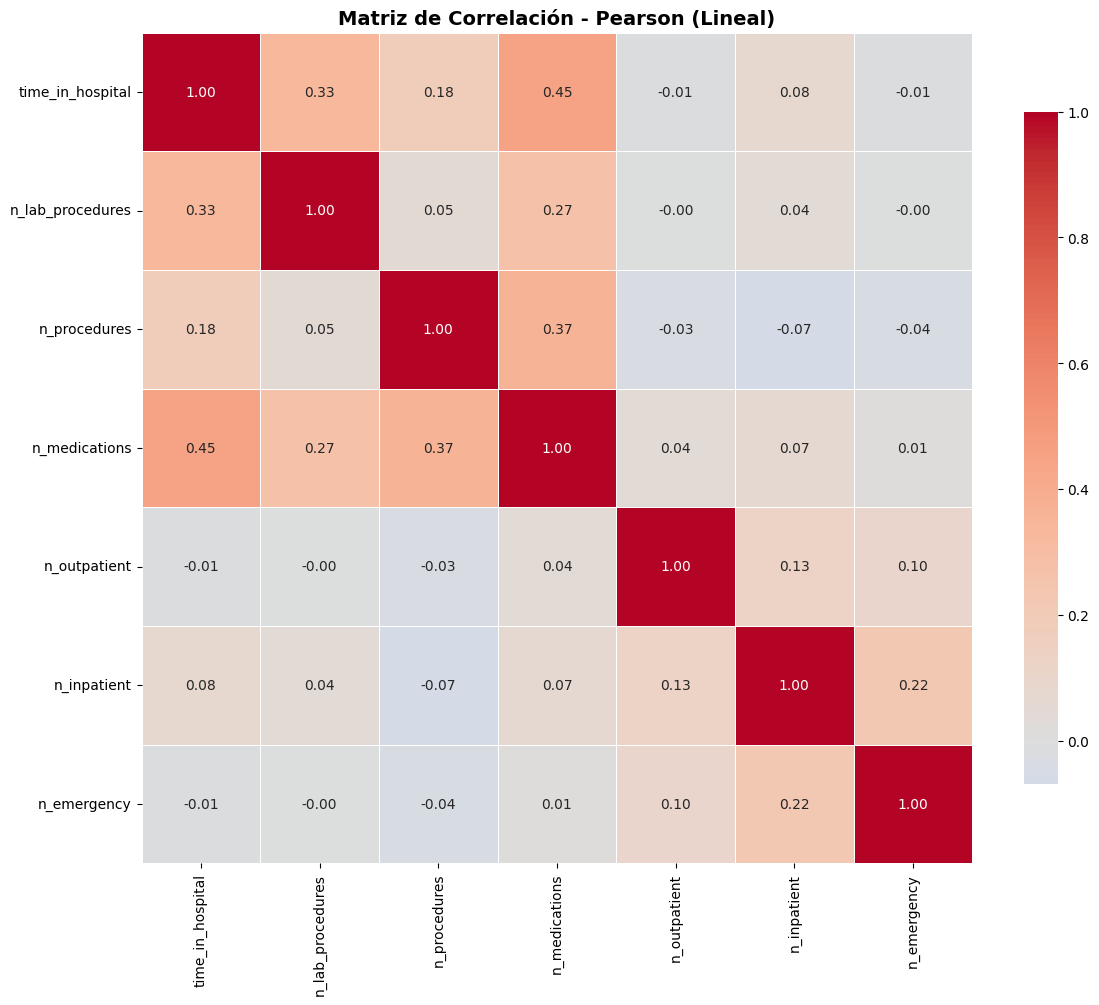

In [26]:
df.groupby("readmitted")["time_in_hospital"].mean()

# Creamos la matriz de correlacion de variables con el metodo pearson
corr_matrix_complete = df.corr(method="pearson", numeric_only=True)

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix_complete, annot=True, cmap='coolwarm', fmt='.2f', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Pearson (Lineal)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Observaciones iniciales

- La base tiene 25000 pacientes y 17 variables.
- El porcentaje de readmisión es aproximadamente 47%, lo que indica que no tiene desbalanceo de clases, ya que los que no presentan readmisiones son el 53%.
- El dataset no cuenta con valores faltantes.
- El comportamiento de las readmisiones con el promedio de la estancia es muy similar entre las clases si y no.
- La variable edad se encuentra como string y es un rango de edades

In [30]:
df.to_csv("../data/hospital_readmissions_1.csv", index=False)